In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from scipy.ndimage import gaussian_filter
from matplotlib.colors import LogNorm, Normalize
import os
from scipy.stats import ks_2samp
import matplotlib.cm as cm
from scipy.stats import binned_statistic_2d as bs2d, binned_statistic as bstat

In [2]:
def normalize(xx):
    vmin=xx.min()
    vmax=xx.max()
    return (xx-vmin)/(vmax-vmin)

# Get Images

In [4]:
direc='./g3rassimages/broad/eco_broad_stacked/'
images=[fits.open(direc+f)[0].data for f in os.listdir(direc)]

In [39]:
eco = pd.read_csv("../g3groups/ECOdata_G3catalog_luminosity.csv")
eco = eco[eco.g3grp_l>0]

In [41]:
np.median(eco.govers)

0.5575074418347443

In [67]:
eco['dphi']=(eco.g3grpradeg_l-eco.radeg)*3600/45 + 30
eco['dtheta']=(eco.g3grpdedeg_l-eco.dedeg)*3600/45 + 30
eco['govers']=((10**eco.logmgas)/(10**eco.logmstar))

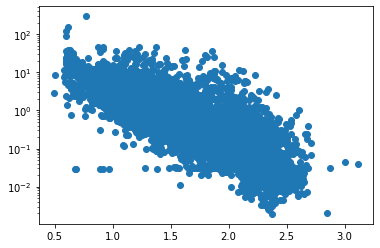

In [68]:
plt.figure()
plt.scatter(eco.modelu_r, eco.govers)
plt.yscale('log')
plt.show()

# Make Plots

## Upper limits/detections

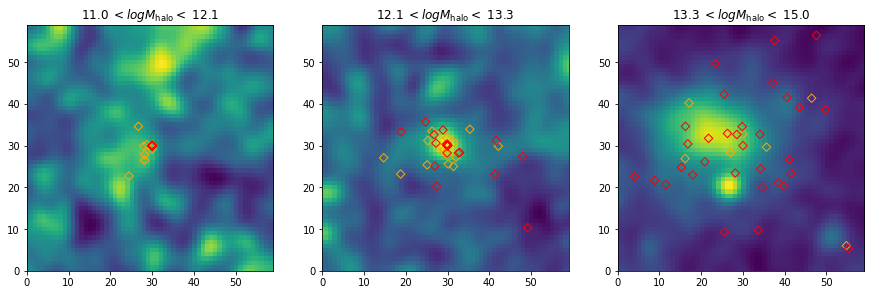

In [96]:
binedges = np.array([11,12.1,13.3,15])
binc = 0.5*(binedges[1:]+binedges[:-1])
fig,axs=plt.subplots(ncols=len(binc),figsize=(15,7))
for ii in range(0,len(binc)):
    axs[ii].imshow(gaussian_filter(images[ii],2))
    axs[ii].set_title("{:0.1f}".format(binedges[:-1][ii]) +r' $< log M_{\rm halo} <$ ' + "{:0.1f}".format(binedges[1:][ii]))
    tmp_ = eco[(eco.logmh>binedges[:-1][ii])&(eco.logmh<binedges[1:][ii])].sample(n=50)
    sel = (tmp_.mhidet>0)
    axs[ii].scatter(tmp_.dphi[sel], tmp_.dtheta[sel], edgecolors='orange', marker='D', facecolors="none")
    sel = (tmp_.mhilim>0)
    axs[ii].scatter(tmp_.dphi[sel], tmp_.dtheta[sel], edgecolors='red', marker='D', facecolors='None')
    #axs[ii].scatter(tmp_.dphi[~highGSflag], tmp_.dtheta[~highGSflag], edgecolors='orange', marker='D', facecolors='None')
    axs[ii].set_xlim(0,59)
    axs[ii].set_ylim(0,59)
plt.show()

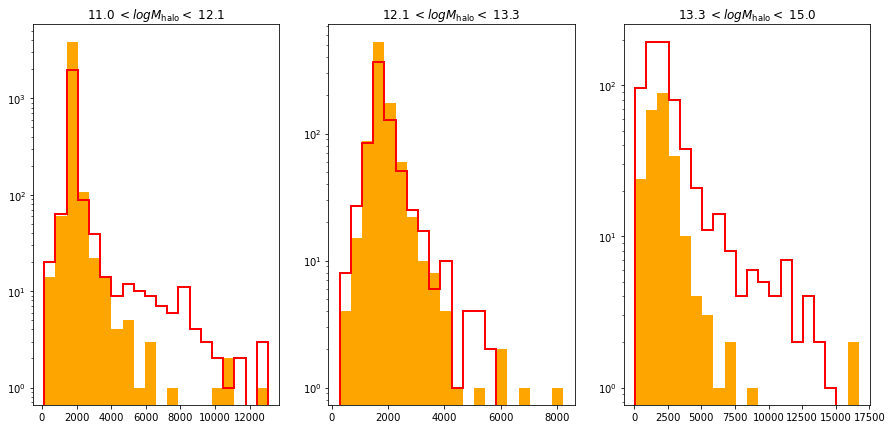

In [104]:
binedges = np.array([11,12.1,13.3,15])
binc = 0.5*(binedges[1:]+binedges[:-1])
fig,axs=plt.subplots(ncols=len(binc),figsize=(15,7))
for ii in range(0,len(binc)):
    #axs[ii].imshow(gaussian_filter(images[ii],2))
    axs[ii].set_title("{:0.1f}".format(binedges[:-1][ii]) +r' $< log M_{\rm halo} <$ ' + "{:0.1f}".format(binedges[1:][ii]))
    tmp_ = eco[(eco.logmh>binedges[:-1][ii])&(eco.logmh<binedges[1:][ii])]
    sel = (tmp_.mhidet>0)
    _,bv,_=axs[ii].hist(tmp_.dphi[sel]**2. + tmp_.dtheta[sel]**2., color='orange', log=True,bins=20)
    sel = (tmp_.mhilim>0)
    axs[ii].hist(tmp_.dphi[sel]**2.+tmp_.dtheta[sel]**2., color='red', log=True,histtype='step',bins=bv,linewidth=2)
    #axs[ii].scatter(tmp_.dphi[~highGSflag], tmp_.dtheta[~highGSflag], edgecolors='orange', marker='D', facecolors='None')
plt.show()

## G/S

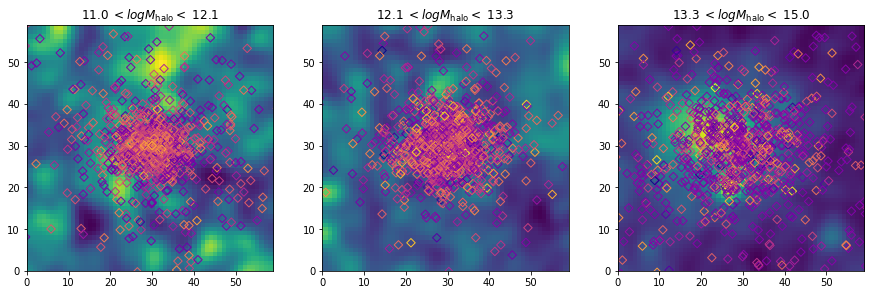

In [95]:
binedges = np.array([11,12.1,13.3,15])
binc = 0.5*(binedges[1:]+binedges[:-1])
fig,axs=plt.subplots(ncols=len(binc),figsize=(15,7))
for ii in range(0,len(binc)):
    axs[ii].imshow(gaussian_filter(images[ii],2))
    axs[ii].set_title("{:0.1f}".format(binedges[:-1][ii]) +r' $< log M_{\rm halo} <$ ' + "{:0.1f}".format(binedges[1:][ii]))
    tmp_ = eco[(eco.logmh>binedges[:-1][ii])&(eco.logmh<binedges[1:][ii])]#.sample(n=100)
    highGSflag = (tmp_.govers>np.median(eco.govers))
    colors=LogNorm(tmp_.govers.min(), tmp_.govers.max())(tmp_.govers)#normalize(tmp_.govers)
    edgecol=cm.plasma(colors)
    axs[ii].scatter(tmp_.dphi, tmp_.dtheta, edgecolors=edgecol, marker='D', facecolors='None')
    #axs[ii].scatter(tmp_.dphi[~highGSflag], tmp_.dtheta[~highGSflag], edgecolors='orange', marker='D', facecolors='None')
    axs[ii].set_xlim(0,59)
    axs[ii].set_ylim(0,59)
plt.show()

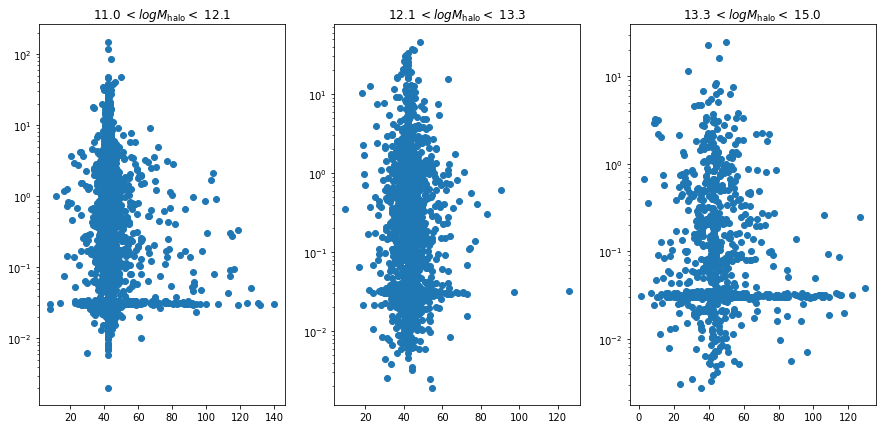

In [70]:
binedges = np.array([11,12.1,13.3,15])
binc = 0.5*(binedges[1:]+binedges[:-1])
fig,axs=plt.subplots(ncols=len(binc),figsize=(15,7))
for ii in range(0,len(binc)):
    #axs[ii].imshow(gaussian_filter(images[ii],2))
    axs[ii].set_title("{:0.1f}".format(binedges[:-1][ii]) +r' $< log M_{\rm halo} <$ ' + "{:0.1f}".format(binedges[1:][ii]))
    
    tmp_ = eco[(eco.logmh>binedges[:-1][ii])&(eco.logmh<binedges[1:][ii])]#.sample(n=200)
    #highGSflag = (tmp_.govers>np.median(eco.govers))
    #_,bv,_=axs[ii].hist(tmp_.dphi[highGSflag]**2. + tmp_.dtheta[highGSflag]**2., log=True, histtype='step',bins=10)
    #axs[ii].hist(tmp_.dphi[~highGSflag]**2.+tmp_.dtheta[~highGSflag]**2.,bins=bv,log=True, histtype='step', linewidth=3)
    #print(ks_2samp(tmp_.dphi[~highGSflag]**2.+tmp_.dtheta[~highGSflag]**2,tmp_.dphi[highGSflag]**2. + tmp_.dtheta[highGSflag]**2.,'less'))
    axs[ii].scatter(np.sqrt(tmp_.dphi**2.+tmp_.dtheta**2), tmp_.govers)
    #axs[ii].set_xscale('log')
    axs[ii].set_yscale('log')
plt.show()

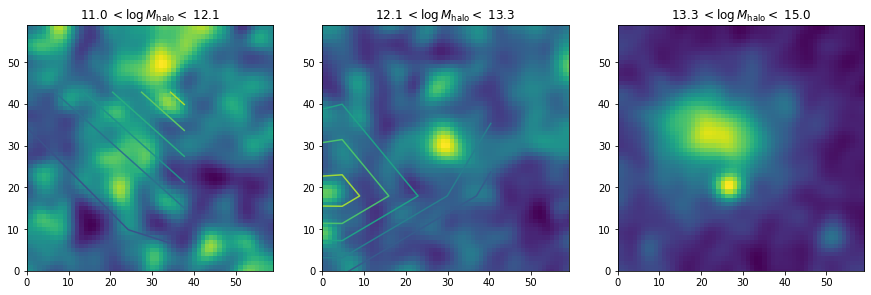

In [87]:
binedges = np.array([11,12.1,13.3,15])
binc = 0.5*(binedges[1:]+binedges[:-1])
fig,axs=plt.subplots(ncols=len(binc),figsize=(15,7))
for ii in range(0,len(binc)):
    axs[ii].imshow(gaussian_filter(images[ii],2))
    axs[ii].set_title("{:0.1f}".format(binedges[:-1][ii]) +r' $< \log M_{\rm halo} <$ ' + "{:0.1f}".format(binedges[1:][ii]))
    tmp_ = eco[(eco.logmh>binedges[:-1][ii])&(eco.logmh<binedges[1:][ii])]#.sample(n=100)
    tmp_ = tmp_[np.sqrt(tmp_.dphi**2. + tmp_.dtheta**2.)<60]
    
    binnedmedian,xedges,yedges,_=bs2d(tmp_.dphi, tmp_.dtheta, tmp_.govers, 'median', bins=3)
    
    axs[ii].contour(0.5*(xedges[1:]+xedges[:-1]), 0.5*(yedges[1:]+yedges[:-1]), binnedmedian)
    #axs[ii].scatter(tmp_.dphi, tmp_.dtheta, edgecolors=edgecol, marker='D', facecolors='None')
    #axs[ii].scatter(tmp_.dphi[~highGSflag], tmp_.dtheta[~highGSflag], edgecolors='orange', marker='D', facecolors='None')
    axs[ii].set_xlim(0,59)
    axs[ii].set_ylim(0,59)
plt.show()

In [81]:
xedges, yedges, binnedmedian

(array([-71.13689563,  -9.29689563,  52.54310437, 114.38310437]),
 array([-27.35821237,   8.3804543 ,  44.11912096,  79.85778763]),
 array([[0.07040482, 0.03100417,        nan],
        [0.0655811 , 0.03294069, 0.03213234],
        [0.13834049, 0.03158792, 0.03135669]]))

In [78]:
tmp_.govers

25       0.818430
45       0.499211
64       0.031233
65       0.030372
125      0.188398
           ...   
12619    0.569296
12625    4.603256
12641    1.228627
12674    0.030384
13574    6.266186
Name: govers, Length: 1028, dtype: float64